In [1]:
import pandas as pd
import scipy.io as io
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.ticker import MaxNLocator
import numpy as np
from matplotlib import gridspec
import seaborn as sns
import pingouin as pg
import copy
import glob
import os

In [2]:
from datetime import datetime, date, time, timezone, timedelta

/home/srj34/deeplabcut-env/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/home/srj34/deeplabcut-env/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [3]:
from scipy import stats
from scipy import sparse

In [4]:
from functools import partial

In [5]:
import mne
from mne.stats import (ttest_1samp_no_p, bonferroni_correction, fdr_correction,
                       permutation_t_test, permutation_cluster_1samp_test)

In [6]:
from mpl_toolkits.mplot3d import Axes3D

In [7]:
import matplotlib.pyplot as plt
font = {'family': 'sans-serif', 'serif': ['Helvetica']}
plt.rc('font', **font)
plt.rc('text', usetex=False)

In [8]:
label_fontsize = 16 
title_fontsize = 18

In [9]:
sns.set(style="ticks", rc={"lines.linewidth": 0.6})

In [10]:
basefilename = "28112018_SponSleep_LFP" #"27072018_SponSleep_LFP","14092018_SponSleep_LFP"
                                        #"17092018_SponSleep_LFP","30102018_SponSleep_LFP"
                                        #"01112018_SponSleep_LFP","03112018_SponSleep_LFP"
                                        #"13112018_SponSleep_LFP","28112018_SponSleep_LFP"
                                        #"11122018_SponSleep_LFP","13122018_SponSleep_LFP"
                                        #"18122018_SponSleep_LFP","10012019_SponSleep_LFP"
                                        #"17012019_SponSleep_LFP","22012019_SponSleep_LFP"
                                        #"20022019_SponSleep_LFP","13032019_SponSleep_LFP"
    
index = "01"

In [11]:
reference = 'neutral' #'neutral','diff'

In [12]:
basefolder = "/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/"

In [13]:
inputfolderpath = basefolder + "drosSleepStages_SciAdvances2023/data/lfp_data/freqtimeseries/"
inputfilepath = inputfolderpath + "freqtimeseries_neutral_ref_" + basefilename + "_sample_" + index +".mat"

In [14]:
outputfolderpath = basefolder + "SleepOnset_Drosophila/Scripts/pics/stats_grouplevel/"

In [15]:
csvfolderpath = basefolder + "drosSleepStages_SciAdvances2023/data/beh_data/movement/" + basefilename + "/"
csvfolderpath

'/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/drosSleepStages_SciAdvances2023/data/beh_data/movement/28112018_SponSleep_LFP/'

In [16]:
csvepochsfolderpath = basefolder + "drosSleepStages_SciAdvances2023/data/beh_data/movement/8hrs_epoched/" 
csvepochsfolderpath

'/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/drosSleepStages_SciAdvances2023/data/beh_data/movement/8hrs_epoched/'

In [17]:
epochs_df = pd.read_csv(csvepochsfolderpath + basefilename + '_merged_epochs.csv')

In [18]:
epochs_df = epochs_df[epochs_df['Type'] == 'sleep']

In [19]:
epochs_df = epochs_df.reset_index()

In [20]:
epochs_df = epochs_df.drop(['index', 'Index'], axis=1)

In [21]:
epochs_df

,Type,Start_time,End_time,Duration
0,sleep,2018-11-28 15:09:25,2018-11-28 15:17:00,2018-11-28 00:07:34
1,sleep,2018-11-28 18:27:37,2018-11-28 18:32:46,2018-11-28 00:05:09
2,sleep,2018-11-28 19:13:49,2018-11-28 19:20:13,2018-11-28 00:06:24


In [22]:
selecepochs_df = epochs_df[epochs_df.index == int(index)-1]
selecepochs_df

,Type,Start_time,End_time,Duration
0,sleep,2018-11-28 15:09:25,2018-11-28 15:17:00,2018-11-28 00:07:34


In [23]:
print("Input file: " + inputfilepath)

Input file: /rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/drosSleepStages_SciAdvances2023/data/lfp_data/freqtimeseries/freqtimeseries_neutral_ref_28112018_SponSleep_LFP_sample_01.mat


In [24]:
#Load the calibration data from some samples..
mat_timeseries = io.loadmat(inputfilepath)

In [25]:
mat_timeseries

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu May  4 22:35:08 2023',
 '__version__': '1.0',
 '__globals__': [],
 'centralPxx': array([[[119.55498048, 132.49673232, 109.22757649, 108.87549805,
           54.29907032],
         [ 80.06772001,  66.22969437,  81.53722286,  98.41671012,
           94.45165446],
         [139.76953331, 153.40278701, 171.06864652, 134.54121569,
          125.87092237],
         ...,
         [116.18306915,  92.46741271,  63.68161203,  76.86619486,
           77.49633691],
         [124.27682906, 124.63683922,  44.19672641,  85.68990398,
           93.68790931],
         [         nan,          nan,          nan,          nan,
                   nan]],
 
        [[ 72.37970206,  80.93507502,  47.37731487,  42.4322426 ,
           37.23637129],
         [ 45.1874362 ,  51.19061763,  68.42175982,  67.86203711,
           52.60469468],
         [112.81895492, 140.28798975, 169.62174669, 156.79150225,
          138.3931069 ],
         ..

In [26]:
centralchan = mat_timeseries['centralPxx']
middlechan = mat_timeseries['middlePxx']
periphchan = mat_timeseries['periphPxx']

In [27]:
centralchan_mean = np.mean(centralchan, axis = 2)
middlechan_mean = np.mean(middlechan, axis = 2)
periphchan_mean = np.mean(periphchan, axis = 2)

In [28]:
np.shape(centralchan)

(36, 697, 5)

In [29]:
np.shape(centralchan_mean)

(36, 697)

In [30]:
cat_freqs = mat_timeseries['freqoi']

In [31]:
np.shape(cat_freqs)

(1, 36)

In [32]:
cat_time = mat_timeseries['timeoi']/60

In [33]:
np.shape(cat_time)

(1, 697)

In [34]:
def plot_spect(data, ax, x, y, x_label, y_label, title, cbar_label, vmin = None, vmax = None):
    
    im = ax.imshow(data,aspect='auto',interpolation='spline36',cmap='jet',vmin=vmin, vmax=vmax)
    
    y_mod = y
    freqs_plot = [5, 10, 15, 20, 25, 30, 35, 40]
    yticklocs = []
    for idx in freqs_plot:
        yticklocs.append(min(range(len(y_mod)), key=lambda i: abs(y_mod[i]-idx)))
    
    ytickvals = np.around(y[yticklocs])
    
    ydispvals = ['%.12g' % n for n in ytickvals]
    
    plt.yticks(yticklocs, ydispvals)
    

    xticklocs = np.arange(0,len(x), step = 60)
    ax.set_xlim([0, np.asarray(x.shape)-1])
    xtickvals = x[xticklocs] #np.around(x[xticklocs])
    
    xdispvals = ['%.12g' % n for n in xtickvals]
    plt.xticks(xticklocs, xdispvals)
    ax.set_xlabel(x_label, rotation=0,ha='center',va='center', fontsize=20, labelpad=20)
    ax.set_ylabel(y_label, rotation=90,ha='center',va='center', fontsize=20, labelpad=20)
    
    ax.invert_yaxis()

    #plt.colorbar(im)
    
    cbarticks = np.linspace(vmin, vmax, 5, endpoint=True)
    cbarticks = np.round(cbarticks,2)
    
    cbar = fig.colorbar(im, ax=ax, ticks = cbarticks, pad = 0.005)
    cbar.ax.set_ylabel(cbar_label, rotation=90, fontsize=20, labelpad=20)
    
    plt.title(title,ha='center',va='bottom', fontsize=20)
    
    cbar.ax.tick_params(labelsize=14)
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    return ax

In [35]:
np.shape(centralchan_mean)

(36, 697)

In [36]:
cat_time

array([[ 0.        ,  0.01666667,  0.03333333,  0.05      ,  0.06666667,
         0.08333333,  0.1       ,  0.11666667,  0.13333333,  0.15      ,
         0.16666667,  0.18333333,  0.2       ,  0.21666667,  0.23333333,
         0.25      ,  0.26666667,  0.28333333,  0.3       ,  0.31666667,
         0.33333333,  0.35      ,  0.36666667,  0.38333333,  0.4       ,
         0.41666667,  0.43333333,  0.45      ,  0.46666667,  0.48333333,
         0.5       ,  0.51666667,  0.53333333,  0.55      ,  0.56666667,
         0.58333333,  0.6       ,  0.61666667,  0.63333333,  0.65      ,
         0.66666667,  0.68333333,  0.7       ,  0.71666667,  0.73333333,
         0.75      ,  0.76666667,  0.78333333,  0.8       ,  0.81666667,
         0.83333333,  0.85      ,  0.86666667,  0.88333333,  0.9       ,
         0.91666667,  0.93333333,  0.95      ,  0.96666667,  0.98333333,
         1.        ,  1.01666667,  1.03333333,  1.05      ,  1.06666667,
         1.08333333,  1.1       ,  1.11666667,  1.1

In [37]:
cat_freqs

array([[ 5.00063154,  5.99960959,  7.00002297,  8.00043634,  8.99941439,
         9.99982776, 11.00024113, 12.0006545 , 12.99963256, 14.00004593,
        15.0004593 , 15.99943736, 16.99985073, 18.0002641 , 19.00067747,
        19.99965552, 21.0000689 , 22.00048227, 22.99946032, 23.99987369,
        25.00028706, 26.00070043, 26.99967849, 28.00009186, 29.00050523,
        29.99948329, 30.99989666, 32.00031003, 32.99928808, 33.99970145,
        35.00011483, 36.0005282 , 36.99950625, 37.99991962, 39.00033299,
        39.99931105]])

In [38]:
np.min(cat_time)

0.0

In [39]:
np.max(cat_time)

11.6

In [40]:
awake_01_time = 1
intrans_01_time = 2
awake_02_time = 1

In [41]:
presleep_time = awake_01_time + intrans_01_time

In [42]:
postsleep_time = awake_02_time

In [43]:
sleeptime = np.max(cat_time) - np.min(cat_time)
sleeptime = sleeptime - presleep_time - postsleep_time
sleeptime

7.6

In [44]:
mask1_freqlims = [4,40] #[5,10],[4,20]

In [45]:
offsetfrom_startsleep = -1
offsetfrom_endsleep = 1

In [46]:
start_idx = presleep_time + offsetfrom_startsleep
start_idx

2

In [47]:
cat_time[0][start_idx]

0.03333333333333333

In [48]:
end_idx = np.max(cat_time)- postsleep_time + offsetfrom_endsleep
end_idx

11.6

In [49]:
mask1_timelims = [start_idx,end_idx] #[0,11.5]

In [50]:
mask1_timelims[0] - 3

-1

In [51]:
mask1_timelims[1] - 3

8.6

In [52]:
mask1_freq = (cat_freqs.flatten() >= mask1_freqlims[0]) & (cat_freqs.flatten() <=mask1_freqlims[1])
mask1_time = (cat_time.flatten() >= mask1_timelims[0]) & (cat_time.flatten() <=mask1_timelims[1])

In [53]:
roi1_cat_time  = cat_time[0][mask1_time]
roi1_cat_freqs = cat_freqs[0][mask1_freq]

In [54]:
roi1_cat_time = roi1_cat_time - presleep_time

In [55]:
roi1_central = centralchan_mean[mask1_freq][:,mask1_time]

In [56]:
roi1_middle = middlechan_mean[mask1_freq][:,mask1_time]

In [57]:
roi1_peripheral = periphchan_mean[mask1_freq][:,mask1_time]

In [58]:
np.shape(centralchan)

(36, 697, 5)

In [59]:
nrows = 4

In [60]:
selecepochs_df

,Type,Start_time,End_time,Duration
0,sleep,2018-11-28 15:09:25,2018-11-28 15:17:00,2018-11-28 00:07:34


In [61]:
start_time = pd.to_datetime(selecepochs_df['Start_time'].values[0], 
                            format='%Y-%m-%d %H:%M:%S') - timedelta(minutes=1)
stop_time =  pd.to_datetime(selecepochs_df['End_time'].values[0],
                            format='%Y-%m-%d %H:%M:%S') + timedelta(minutes=1)

In [62]:
print('from : ',start_time)
print('to   : ',stop_time)

from :  2018-11-28 15:08:25
to   :  2018-11-28 15:18:00


In [63]:
hourstoanalyse = ['01', '02', '03','04', '05', '06','07', '08', '09']

In [64]:
for houridx, hourval in enumerate(hourstoanalyse):
    
    movment_df = pd.read_csv(csvfolderpath + basefilename + '_' + hourval + '_mov.csv')
    
    movment_df['disptime'] = movment_df['Year'].astype(str) + '-'+ movment_df['Month'].astype(str) + '-' +\
                         movment_df['Date'].astype(str) + ' '+ movment_df['Hour'].astype(str)  + ':' +\
                         movment_df['Mins'].astype(str) + ':'+ movment_df['Seconds'].astype(str)
    
    movment_df['disptime'] = pd.to_datetime(movment_df['disptime'], format='%Y-%m-%d %H:%M:%S')
    
    if houridx == 0:
        allmovment_df = movment_df
    else:
        allmovment_df = allmovment_df.append(movment_df)

In [65]:
allmovment_df = allmovment_df.reset_index()

In [66]:
allmovment_df

,index,Year,Month,Date,Hour,Mins,Seconds,usec,nFrames,Movement,Area,disptime
0,0,2018,11,28,14,23,36,403000,1,Still,0.0,2018-11-28 14:23:36
1,1,2018,11,28,14,23,36,438000,2,Moved,19093.0,2018-11-28 14:23:36
2,2,2018,11,28,14,23,36,462000,3,Still,0.0,2018-11-28 14:23:36
3,3,2018,11,28,14,23,36,498000,4,Moved,312.0,2018-11-28 14:23:36
4,4,2018,11,28,14,23,36,534000,5,Moved,929.0,2018-11-28 14:23:36
...,...,...,...,...,...,...,...,...,...,...,...,...
893489,99285,2018,11,28,23,23,36,691000,99286,Still,0.0,2018-11-28 23:23:36
893490,99286,2018,11,28,23,23,36,727000,99287,Still,0.0,2018-11-28 23:23:36
893491,99287,2018,11,28,23,23,36,764000,99288,Still,0.0,2018-11-28 23:23:36
893492,99288,2018,11,28,23,23,36,800000,99289,Still,0.0,2018-11-28 23:23:36


In [67]:
plotbeh_df = allmovment_df.copy()

In [68]:
selectindx = ((plotbeh_df.disptime >= start_time) &
             (plotbeh_df.disptime <= stop_time))

In [69]:
selectindx

0         False
1         False
2         False
3         False
4         False
          ...  
893489    False
893490    False
893491    False
893492    False
893493    False
Name: disptime, Length: 893494, dtype: bool

In [70]:
plotlabels_df = plotbeh_df.loc[selectindx]

plotlabels_df.loc[:,'Area'] = plotlabels_df.loc[selectindx, 'Area']

plotlabels_df.loc[:,'disptime2'] = plotlabels_df.loc[selectindx, 'disptime']

plotlabels_df.loc[:,'disptime'] = pd.to_datetime(plotlabels_df['disptime']).dt.strftime('%H:%M:%S')

plotlabels_df = plotlabels_df.reset_index()

plotlabels_df

/home/srj34/deeplabcut-env/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/srj34/deeplabcut-env/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


,level_0,index,Year,Month,Date,Hour,Mins,Seconds,usec,nFrames,Movement,Area,disptime,disptime2
0,74134,74134,2018,11,28,15,8,25,29000,74135,Moved,379.0,15:08:25,2018-11-28 15:08:25
1,74135,74135,2018,11,28,15,8,25,65000,74136,Moved,84.5,15:08:25,2018-11-28 15:08:25
2,74136,74136,2018,11,28,15,8,25,102000,74137,Moved,235.0,15:08:25,2018-11-28 15:08:25
3,74137,74137,2018,11,28,15,8,25,137000,74138,Moved,812.0,15:08:25,2018-11-28 15:08:25
4,74138,74138,2018,11,28,15,8,25,174000,74139,Moved,574.0,15:08:25,2018-11-28 15:08:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15878,90012,90012,2018,11,28,15,18,0,835000,90013,Still,0.0,15:18:00,2018-11-28 15:18:00
15879,90013,90013,2018,11,28,15,18,0,871000,90014,Moved,117.5,15:18:00,2018-11-28 15:18:00
15880,90014,90014,2018,11,28,15,18,0,907000,90015,Still,0.0,15:18:00,2018-11-28 15:18:00
15881,90015,90015,2018,11,28,15,18,0,944000,90016,Still,0.0,15:18:00,2018-11-28 15:18:00


In [71]:
import matplotlib.patches as patches

In [72]:
start_time = pd.to_datetime(selecepochs_df['Start_time'].values[0], 
                            format='%Y-%m-%d %H:%M:%S') - timedelta(minutes=1)
stop_time =  pd.to_datetime(selecepochs_df['End_time'].values[0],
                            format='%Y-%m-%d %H:%M:%S') + timedelta(minutes=1)

In [73]:
start_time

Timestamp('2018-11-28 15:08:25')

In [74]:
stop_time

Timestamp('2018-11-28 15:18:00')

In [75]:
selecepochs_df

,Type,Start_time,End_time,Duration
0,sleep,2018-11-28 15:09:25,2018-11-28 15:17:00,2018-11-28 00:07:34


In [76]:
awakestart_01 = start_time
awakeend_01 =   start_time  + timedelta(minutes=1)
awakeselectindx_01 = np.where((plotlabels_df.disptime2 >= awakestart_01) &
                              (plotlabels_df.disptime2 <= awakeend_01))

In [77]:
sleepstart_01 = awakeend_01
sleepend_01 =   stop_time  - timedelta(minutes=1)
sleepselectindx_01 = np.where((plotlabels_df.disptime2 >= sleepstart_01) &
                              (plotlabels_df.disptime2 <= sleepend_01))

In [78]:
awakestart_02 = sleepend_01
awakeend_02 =   awakestart_02  + timedelta(minutes=1)
awakeselectindx_02 = np.where((plotlabels_df.disptime2 >= awakestart_02) &
                              (plotlabels_df.disptime2 <= awakeend_02))

In [79]:
def convert2secs(x):
    x = x.split(":")
    if len(x) == 2:
        return int(x[0]) * 60 + int(x[1])
    return int(x[0]) * 3600 + int(x[1]) * 60 + int(x[2])

In [80]:
plotlabels_df["disptime_mins"] = plotlabels_df["disptime"].apply(convert2secs)

In [81]:
plotlabels_df["disptime_mins"] = plotlabels_df["disptime_mins"]/60

In [82]:
tempidx = np.min(np.where(plotlabels_df["disptime2"] == sleepstart_01))
tempidx

1655

In [83]:
plotlabels_df["disptime_mins"] = plotlabels_df["disptime_mins"] - plotlabels_df["disptime_mins"][tempidx]

In [84]:
plotlabels_df.disptime_mins = plotlabels_df.disptime_mins.round(2)

In [85]:
# plotlabels_df["disptime_mins"] = plotlabels_df["disptime_mins"].astype(int)

In [86]:
plotlabels_df.head()

,level_0,index,Year,Month,Date,Hour,Mins,Seconds,usec,nFrames,Movement,Area,disptime,disptime2,disptime_mins
0,74134,74134,2018,11,28,15,8,25,29000,74135,Moved,379.0,15:08:25,2018-11-28 15:08:25,-1.0
1,74135,74135,2018,11,28,15,8,25,65000,74136,Moved,84.5,15:08:25,2018-11-28 15:08:25,-1.0
2,74136,74136,2018,11,28,15,8,25,102000,74137,Moved,235.0,15:08:25,2018-11-28 15:08:25,-1.0
3,74137,74137,2018,11,28,15,8,25,137000,74138,Moved,812.0,15:08:25,2018-11-28 15:08:25,-1.0
4,74138,74138,2018,11,28,15,8,25,174000,74139,Moved,574.0,15:08:25,2018-11-28 15:08:25,-1.0


In [87]:
plotlabels_df.tail()

,level_0,index,Year,Month,Date,Hour,Mins,Seconds,usec,nFrames,Movement,Area,disptime,disptime2,disptime_mins
15878,90012,90012,2018,11,28,15,18,0,835000,90013,Still,0.0,15:18:00,2018-11-28 15:18:00,8.58
15879,90013,90013,2018,11,28,15,18,0,871000,90014,Moved,117.5,15:18:00,2018-11-28 15:18:00,8.58
15880,90014,90014,2018,11,28,15,18,0,907000,90015,Still,0.0,15:18:00,2018-11-28 15:18:00,8.58
15881,90015,90015,2018,11,28,15,18,0,944000,90016,Still,0.0,15:18:00,2018-11-28 15:18:00,8.58
15882,90016,90016,2018,11,28,15,18,0,980000,90017,Still,0.0,15:18:00,2018-11-28 15:18:00,8.58


/home/srj34/deeplabcut-env/lib/python3.6/site-packages/pandas/core/indexes/range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/home/srj34/deeplabcut-env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/srj34/deeplabcut-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


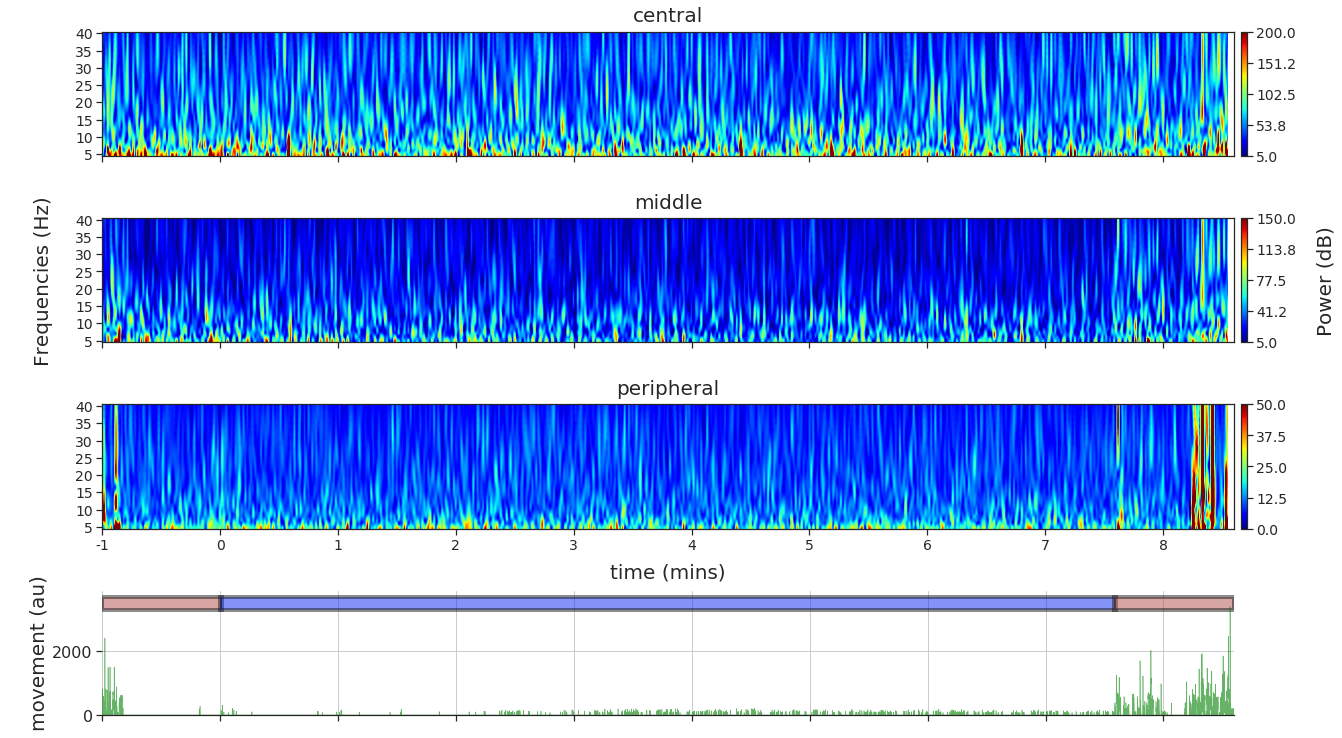

In [88]:
fig = plt.figure(figsize=(6*nrows, (12/3)*nrows))
gs_main = gridspec.GridSpec(nrows+1, 1)
gs_main.update(wspace=0.05, hspace=0.50)

gs = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_main[0])
ax1 = fig.add_subplot(gs[0])
ax1 = plot_spect(roi1_central, ax = ax1, x = roi1_cat_time, y = roi1_cat_freqs, 
                 x_label = '',y_label = '', title = 'central', 
                 cbar_label = '',
                 vmin = 5, vmax = 200) #vmin = 0, vmax = 300, vmin = 5, vmax = 200
ax1.tick_params(labelbottom=False)

gs = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_main[1])
ax2 = fig.add_subplot(gs[0])
ax2 = plot_spect(roi1_middle, ax = ax2, x = roi1_cat_time, y = roi1_cat_freqs, 
                 x_label = '',y_label = 'Frequencies (Hz)\n', title = 'middle', 
                 cbar_label = 'Power (dB)',
                 vmin = 5, vmax = 150) #vmin = 0, vmax = 200, vmin = 5, vmax = 150
ax2.tick_params(labelbottom=False)

gs = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_main[2])
ax3 = fig.add_subplot(gs[0])
ax3 = plot_spect(roi1_peripheral, ax = ax3, x = roi1_cat_time, y = roi1_cat_freqs, 
                 x_label = 'time (mins)',y_label = '', title = 'peripheral', 
                 cbar_label = '',
                 vmin = 0, vmax = 50) #vmin = 0, vmax = 100, vmin = 0, vmax = 50


gs = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_main[3])
ax4 = fig.add_subplot(gs[0])

pos = ax3.get_position()
pos2 = ax4.get_position()
ax4.set_position([pos.x0,pos2.y0,pos.width,pos2.height])

ax4.plot(plotlabels_df.index,plotlabels_df['Area'],color='green', alpha = 0.6)
ax4.set_xticks(plotlabels_df.index[0::tempidx])
ax4.set_xticklabels(plotlabels_df["disptime_mins"].values[0::tempidx])
plt.setp(ax4.get_xticklabels(), rotation=0)

ax4.margins(x=0)


ax4.add_patch(patches.Rectangle(xy=(np.min(awakeselectindx_01), np.max(plotlabels_df['Area'])-100),  # point of origin.
                               width=np.max(awakeselectindx_01), 
                               height=400, linewidth=4,
                              color='#b34d4d', ec = 'k', fill=True, alpha = 0.5))

ax4.add_patch(patches.Rectangle(xy=(np.min(sleepselectindx_01), np.max(plotlabels_df['Area'])-100),  # point of origin.
                               width=len(sleepselectindx_01[0]), height=400, linewidth=4,
                              color='#0d28f2', ec = 'k', fill=True, alpha = 0.5))

ax4.add_patch(patches.Rectangle(xy=(np.min(awakeselectindx_02), np.max(plotlabels_df['Area'])-100),  # point of origin.
                               width=len(awakeselectindx_02[0]), height=400, linewidth=4,
                              color='#b34d4d', ec = 'k', fill=True, alpha = 0.5))

# sns.despine(left=True, bottom = True)

ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_visible(True)

ax4.tick_params(labelbottom=False)

ax4.grid(True)

ax4.set_ylim([0, np.max(plotlabels_df['Area'])+500])

ax4.set_ylabel('\nmovement (au)', fontsize=20)
# ax4.set_xlabel('\ntime (mins)', fontsize=20)
ax4.tick_params(axis='both', which='major', labelsize=label_fontsize)

# plt.savefig(outputfolderpath +  basefilename[0:-4] + '_' + index + '_epoch_sleepstage_spectogram.png',
#             format='png', dpi=300, transparent=False, bbox_inches='tight')
